In [12]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = xr.tutorial.open_dataset('rasm').load()

ds['time'] = ds.indexes['time'].to_datetimeindex()
ds

<ipython-input-2-c5907f3eabaf>:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) datetime64[ns] 1980-09-16T12:00:00 1980-10-17 ... 1983-08-17
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan ... 29.8 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:                   Tue Dec 27 14:15:22 2016: ncatted -a dimension...

# Coarsening

In [7]:
ds_coarsened = ds.coarsen(x=11).mean().coarsen(y=5).mean()

ds_coarsened

C:\Anaconda3\envs\Python_3.8\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (time: 36, x: 25, y: 41)
Coordinates:
  * time     (time) datetime64[ns] 1980-09-16T12:00:00 1980-10-17 ... 1983-08-17
    xc       (y, x) float64 189.6 191.6 193.8 196.2 ... 27.64 23.92 20.58 17.6
    yc       (y, x) float64 18.09 20.82 23.57 26.32 ... 37.17 34.62 31.95 29.21
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan ... 24.54 24.55 26.98 28.37

In [16]:

def isbetween_xr(ds, xrange, yrange):
    
    return (ds.where( (ds.coords['xc'] >= xrange[0]) & (ds.coords['xc'] <= xrange[1]) &
            (ds.coords['yc'] >= yrange[0]) & (ds.coords['yc'] <= yrange[1]) , drop=True
                    )
            
           )

C:\Anaconda3\envs\Python_3.8\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


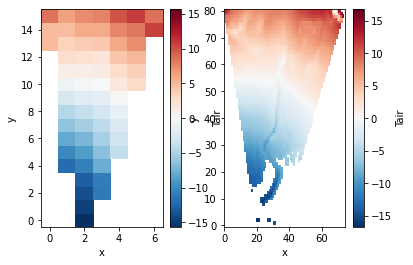

In [18]:
ds_sliced_coarsened = isbetween_xr(ds_coarsened, [40, 80] ,[40, 80])
ds_sliced = isbetween_xr(ds, [40, 80] ,[40, 80])

fig, ax = plt.subplots(1,2)
ax = ax.ravel()

ds_sliced_coarsened.mean('time')['Tair'].plot(x='x', y='y', ax=ax[0])

ds_sliced.mean('time')['Tair'].plot(x='x', y='y', ax=ax[1])